In [1]:
from __future__ import division, print_function
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras.layers import Dense,BatchNormalization,LSTM
from tensorflow.python.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
import os
import matplotlib.pyplot as plt


In [2]:
data = np.load('/home/chase/Boyka/Lyu/fac_cond256_unit8.npz')
raw_X=data['cond']
# raw_X=np.squeeze(raw_X)
raw_X[0]
x_min=np.min(raw_X)
x_max=np.max(raw_X)
raw_Y=data['fac']
raw_Y=raw_Y.astype(np.float64)
y_min=[np.min(raw_Y[:,0]),np.min(raw_Y[:,1]),np.min(raw_Y[:,2])]
y_max=[np.max(raw_Y[:,0]),np.max(raw_Y[:,1]),np.max(raw_Y[:,2])]
# raw_X=(raw_X[:,0]-x_min)/(x_max-x_min)
raw_Y[:,0]=(raw_Y[:,0]-y_min[0])/(y_max[0]-y_min[0])
raw_Y[:,1]=(raw_Y[:,1]-y_min[1])/(y_max[1]-y_min[1])
raw_Y[:,2]=(raw_Y[:,2]-y_min[2])/(y_max[2]-y_min[2])
BATCH_SIZE = 256 
NUM_TIMESTEPS = 65
HIDDEN_SIZE = 10
NUM_EPOCHS = 1000
Xtrain=raw_X[:-1000]
Ytrain=raw_Y[:-1000]
Xtest=raw_X[-1000:]
Ytest=raw_Y[-1000:]
print(y_max)
print(y_max[0]-y_min[0],y_max[1]-y_min[1],y_max[2]-y_min[2])

[4.999253, 0.849988, 0.029993]
3.9978760000000007 0.09995299999999996 0.029987


In [3]:
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
# Xtrain[0],Ytrain[0]

(2000, 65, 1) (1000, 65, 1) (2000, 3) (1000, 3)


In [4]:
model = Sequential()
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=True))
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=True))
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=True))
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=True,activation='tanh'))
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=False,activation='tanh'))
# model.add(Activation('tanh'))
model.add(Dense(3))
model.summary()

model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 65, 10)            480       
_________________________________________________________________
lstm_1 (LSTM)                (None, 65, 10)            840       
_________________________________________________________________
lstm_2 (LSTM)                (None, 65, 10)            840       
_________________________________________________________________
lstm_3 (LSTM)                (None, 65, 10)            840       
_________________________________________________________________
lstm_4 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense (Dense)                (None, 3)                 33        
Total params: 3,873
Trainable params: 3,873
Non-trainable params: 0
______________________________________________________

In [5]:
history=model.fit(Xtrain, Ytrain, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(Xtest, Ytest),shuffle=True)

score, _ = model.evaluate(Xtest, Ytest, batch_size=BATCH_SIZE)

model.save('data_norm_5000ep_lstm.h5')



Epoch 1/1000
8/8 [==============================] - 12s 700ms/step - loss: 0.3114 - mean_squared_error: 0.3114 - val_loss: 0.2745 - val_mean_squared_error: 0.2745
Epoch 2/1000
8/8 [==============================] - 5s 618ms/step - loss: 0.2351 - mean_squared_error: 0.2351 - val_loss: 0.1766 - val_mean_squared_error: 0.1766
Epoch 3/1000
8/8 [==============================] - 5s 612ms/step - loss: 0.1547 - mean_squared_error: 0.1547 - val_loss: 0.1318 - val_mean_squared_error: 0.1318
Epoch 4/1000
8/8 [==============================] - 5s 606ms/step - loss: 0.1093 - mean_squared_error: 0.1093 - val_loss: 0.0909 - val_mean_squared_error: 0.0909
Epoch 5/1000
8/8 [==============================] - 5s 611ms/step - loss: 0.0880 - mean_squared_error: 0.0880 - val_loss: 0.0851 - val_mean_squared_error: 0.0851
Epoch 6/1000
8/8 [==============================] - 5s 609ms/step - loss: 0.0856 - mean_squared_error: 0.0856 - val_loss: 0.0861 - val_mean_squared_error: 0.0861
Epoch 7/1000
8/8 [=========

8/8 [==============================] - 5s 615ms/step - loss: 0.0835 - mean_squared_error: 0.0835 - val_loss: 0.0834 - val_mean_squared_error: 0.0834
Epoch 52/1000
8/8 [==============================] - 5s 607ms/step - loss: 0.0835 - mean_squared_error: 0.0835 - val_loss: 0.0834 - val_mean_squared_error: 0.0834
Epoch 53/1000
8/8 [==============================] - 5s 605ms/step - loss: 0.0835 - mean_squared_error: 0.0835 - val_loss: 0.0834 - val_mean_squared_error: 0.0834
Epoch 54/1000
8/8 [==============================] - 5s 614ms/step - loss: 0.0835 - mean_squared_error: 0.0835 - val_loss: 0.0834 - val_mean_squared_error: 0.0834
Epoch 55/1000
8/8 [==============================] - 5s 605ms/step - loss: 0.0835 - mean_squared_error: 0.0835 - val_loss: 0.0834 - val_mean_squared_error: 0.0834
Epoch 56/1000
8/8 [==============================] - 5s 611ms/step - loss: 0.0835 - mean_squared_error: 0.0835 - val_loss: 0.0834 - val_mean_squared_error: 0.0834
Epoch 57/1000
8/8 [=================

8/8 [==============================] - 5s 610ms/step - loss: 0.0834 - mean_squared_error: 0.0834 - val_loss: 0.0834 - val_mean_squared_error: 0.0834
Epoch 102/1000
8/8 [==============================] - 5s 606ms/step - loss: 0.0834 - mean_squared_error: 0.0834 - val_loss: 0.0833 - val_mean_squared_error: 0.0833
Epoch 103/1000
8/8 [==============================] - 5s 601ms/step - loss: 0.0834 - mean_squared_error: 0.0834 - val_loss: 0.0833 - val_mean_squared_error: 0.0833
Epoch 104/1000
8/8 [==============================] - 5s 610ms/step - loss: 0.0834 - mean_squared_error: 0.0834 - val_loss: 0.0833 - val_mean_squared_error: 0.0833
Epoch 105/1000
8/8 [==============================] - 5s 615ms/step - loss: 0.0834 - mean_squared_error: 0.0834 - val_loss: 0.0834 - val_mean_squared_error: 0.0834
Epoch 106/1000
8/8 [==============================] - 5s 618ms/step - loss: 0.0835 - mean_squared_error: 0.0835 - val_loss: 0.0834 - val_mean_squared_error: 0.0834
Epoch 107/1000
8/8 [===========

8/8 [==============================] - 5s 610ms/step - loss: 0.0569 - mean_squared_error: 0.0569 - val_loss: 0.0571 - val_mean_squared_error: 0.0571
Epoch 152/1000
8/8 [==============================] - 5s 618ms/step - loss: 0.0577 - mean_squared_error: 0.0577 - val_loss: 0.0572 - val_mean_squared_error: 0.0572
Epoch 153/1000
8/8 [==============================] - 5s 620ms/step - loss: 0.0570 - mean_squared_error: 0.0570 - val_loss: 0.0572 - val_mean_squared_error: 0.0572
Epoch 154/1000
8/8 [==============================] - 5s 612ms/step - loss: 0.0570 - mean_squared_error: 0.0570 - val_loss: 0.0565 - val_mean_squared_error: 0.0565
Epoch 155/1000
8/8 [==============================] - 5s 608ms/step - loss: 0.0563 - mean_squared_error: 0.0563 - val_loss: 0.0561 - val_mean_squared_error: 0.0561
Epoch 156/1000
8/8 [==============================] - 5s 612ms/step - loss: 0.0560 - mean_squared_error: 0.0560 - val_loss: 0.0558 - val_mean_squared_error: 0.0558
Epoch 157/1000
8/8 [===========

8/8 [==============================] - 5s 611ms/step - loss: 0.0438 - mean_squared_error: 0.0438 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 202/1000
8/8 [==============================] - 5s 605ms/step - loss: 0.0424 - mean_squared_error: 0.0424 - val_loss: 0.0404 - val_mean_squared_error: 0.0404
Epoch 203/1000
8/8 [==============================] - 5s 626ms/step - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.0394 - val_mean_squared_error: 0.0394
Epoch 204/1000
8/8 [==============================] - 5s 609ms/step - loss: 0.0435 - mean_squared_error: 0.0435 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 205/1000
8/8 [==============================] - 5s 617ms/step - loss: 0.0497 - mean_squared_error: 0.0497 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 206/1000
8/8 [==============================] - 5s 620ms/step - loss: 0.0457 - mean_squared_error: 0.0457 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 207/1000
8/8 [===========

8/8 [==============================] - 5s 604ms/step - loss: 0.0384 - mean_squared_error: 0.0384 - val_loss: 0.0369 - val_mean_squared_error: 0.0369
Epoch 252/1000
8/8 [==============================] - 5s 608ms/step - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 253/1000
8/8 [==============================] - 5s 596ms/step - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.0364 - val_mean_squared_error: 0.0364
Epoch 254/1000
8/8 [==============================] - 5s 605ms/step - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.0360 - val_mean_squared_error: 0.0360
Epoch 255/1000
8/8 [==============================] - 5s 610ms/step - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.0362 - val_mean_squared_error: 0.0362
Epoch 256/1000
8/8 [==============================] - 5s 616ms/step - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.0354 - val_mean_squared_error: 0.0354
Epoch 257/1000
8/8 [===========

8/8 [==============================] - 5s 598ms/step - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.0354 - val_mean_squared_error: 0.0354
Epoch 302/1000
8/8 [==============================] - 5s 606ms/step - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 303/1000
8/8 [==============================] - 5s 608ms/step - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.0363 - val_mean_squared_error: 0.0363
Epoch 304/1000
8/8 [==============================] - 5s 610ms/step - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.0341 - val_mean_squared_error: 0.0341
Epoch 305/1000
8/8 [==============================] - 5s 614ms/step - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.0340 - val_mean_squared_error: 0.0340
Epoch 306/1000
8/8 [==============================] - 5s 604ms/step - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.0342 - val_mean_squared_error: 0.0342
Epoch 307/1000
8/8 [===========

8/8 [==============================] - 5s 605ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0349 - val_mean_squared_error: 0.0349
Epoch 352/1000
8/8 [==============================] - 5s 621ms/step - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.0342 - val_mean_squared_error: 0.0342
Epoch 353/1000
8/8 [==============================] - 5s 598ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0339 - val_mean_squared_error: 0.0339
Epoch 354/1000
8/8 [==============================] - 5s 611ms/step - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.0336 - val_mean_squared_error: 0.0336
Epoch 355/1000
8/8 [==============================] - 5s 606ms/step - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.0338 - val_mean_squared_error: 0.0338
Epoch 356/1000
8/8 [==============================] - 5s 609ms/step - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.0337 - val_mean_squared_error: 0.0337
Epoch 357/1000
8/8 [===========

8/8 [==============================] - 5s 609ms/step - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.0354 - val_mean_squared_error: 0.0354
Epoch 402/1000
8/8 [==============================] - 5s 605ms/step - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.0342 - val_mean_squared_error: 0.0342
Epoch 403/1000
8/8 [==============================] - 5s 601ms/step - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.0333 - val_mean_squared_error: 0.0333
Epoch 404/1000
8/8 [==============================] - 5s 607ms/step - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.0347 - val_mean_squared_error: 0.0347
Epoch 405/1000
8/8 [==============================] - 5s 617ms/step - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.0333 - val_mean_squared_error: 0.0333
Epoch 406/1000
8/8 [==============================] - 5s 609ms/step - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 407/1000
8/8 [===========

8/8 [==============================] - 5s 602ms/step - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 452/1000
8/8 [==============================] - 5s 604ms/step - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.0331 - val_mean_squared_error: 0.0331
Epoch 453/1000
8/8 [==============================] - 5s 604ms/step - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 454/1000
8/8 [==============================] - 5s 612ms/step - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.0337 - val_mean_squared_error: 0.0337
Epoch 455/1000
8/8 [==============================] - 5s 620ms/step - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.0333 - val_mean_squared_error: 0.0333
Epoch 456/1000
8/8 [==============================] - 5s 602ms/step - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.0355 - val_mean_squared_error: 0.0355
Epoch 457/1000
8/8 [===========

8/8 [==============================] - 5s 603ms/step - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.0344 - val_mean_squared_error: 0.0344
Epoch 502/1000
8/8 [==============================] - 5s 605ms/step - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.0337 - val_mean_squared_error: 0.0337
Epoch 503/1000
8/8 [==============================] - 5s 615ms/step - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 504/1000
8/8 [==============================] - 5s 616ms/step - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.0335 - val_mean_squared_error: 0.0335
Epoch 505/1000
8/8 [==============================] - 5s 595ms/step - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.0341 - val_mean_squared_error: 0.0341
Epoch 506/1000
8/8 [==============================] - 5s 604ms/step - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.0338 - val_mean_squared_error: 0.0338
Epoch 507/1000
8/8 [===========

8/8 [==============================] - 5s 614ms/step - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 552/1000
8/8 [==============================] - 5s 609ms/step - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.0327 - val_mean_squared_error: 0.0327
Epoch 553/1000
8/8 [==============================] - 5s 613ms/step - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 554/1000
8/8 [==============================] - 5s 604ms/step - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.0332 - val_mean_squared_error: 0.0332
Epoch 555/1000
8/8 [==============================] - 5s 606ms/step - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.0331 - val_mean_squared_error: 0.0331
Epoch 556/1000
8/8 [==============================] - 5s 608ms/step - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 557/1000
8/8 [===========

8/8 [==============================] - 5s 615ms/step - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 602/1000
8/8 [==============================] - 5s 602ms/step - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.0363 - val_mean_squared_error: 0.0363
Epoch 603/1000
8/8 [==============================] - 5s 613ms/step - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.0333 - val_mean_squared_error: 0.0333
Epoch 604/1000
8/8 [==============================] - 5s 603ms/step - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.0324 - val_mean_squared_error: 0.0324
Epoch 605/1000
8/8 [==============================] - 5s 617ms/step - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.0328 - val_mean_squared_error: 0.0328
Epoch 606/1000
8/8 [==============================] - 5s 601ms/step - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 607/1000
8/8 [===========

8/8 [==============================] - 5s 609ms/step - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.0342 - val_mean_squared_error: 0.0342
Epoch 652/1000
8/8 [==============================] - 5s 608ms/step - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 653/1000
8/8 [==============================] - 5s 606ms/step - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 654/1000
8/8 [==============================] - 5s 607ms/step - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.0327 - val_mean_squared_error: 0.0327
Epoch 655/1000
8/8 [==============================] - 5s 607ms/step - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.0345 - val_mean_squared_error: 0.0345
Epoch 656/1000
8/8 [==============================] - 5s 605ms/step - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.0339 - val_mean_squared_error: 0.0339
Epoch 657/1000
8/8 [===========

8/8 [==============================] - 5s 604ms/step - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 702/1000
8/8 [==============================] - 5s 607ms/step - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.0307 - val_mean_squared_error: 0.0307
Epoch 703/1000
8/8 [==============================] - 5s 593ms/step - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 704/1000
8/8 [==============================] - 5s 616ms/step - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 705/1000
8/8 [==============================] - 5s 621ms/step - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.0353 - val_mean_squared_error: 0.0353
Epoch 706/1000
8/8 [==============================] - 5s 604ms/step - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 707/1000
8/8 [===========

8/8 [==============================] - 5s 608ms/step - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 752/1000
8/8 [==============================] - 5s 616ms/step - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.0299 - val_mean_squared_error: 0.0299
Epoch 753/1000
8/8 [==============================] - 5s 602ms/step - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 754/1000
8/8 [==============================] - 5s 603ms/step - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 755/1000
8/8 [==============================] - 5s 605ms/step - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 756/1000
8/8 [==============================] - 5s 606ms/step - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 757/1000
8/8 [===========

8/8 [==============================] - 5s 614ms/step - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 802/1000
8/8 [==============================] - 5s 614ms/step - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 803/1000
8/8 [==============================] - 5s 607ms/step - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.0362 - val_mean_squared_error: 0.0362
Epoch 804/1000
8/8 [==============================] - 5s 606ms/step - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 805/1000
8/8 [==============================] - 5s 614ms/step - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.0301 - val_mean_squared_error: 0.0301
Epoch 806/1000
8/8 [==============================] - 5s 597ms/step - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 807/1000
8/8 [===========

8/8 [==============================] - 5s 613ms/step - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 852/1000
8/8 [==============================] - 5s 613ms/step - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 853/1000
8/8 [==============================] - 5s 603ms/step - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 854/1000
8/8 [==============================] - 5s 615ms/step - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 855/1000
8/8 [==============================] - 5s 612ms/step - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 856/1000
8/8 [==============================] - 5s 613ms/step - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 857/1000
8/8 [===========

8/8 [==============================] - 5s 603ms/step - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 902/1000
8/8 [==============================] - 5s 607ms/step - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 903/1000
8/8 [==============================] - 5s 616ms/step - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 904/1000
8/8 [==============================] - 5s 610ms/step - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 905/1000
8/8 [==============================] - 5s 604ms/step - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0287 - val_mean_squared_error: 0.0287
Epoch 906/1000
8/8 [==============================] - 5s 612ms/step - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 907/1000
8/8 [===========

8/8 [==============================] - 5s 604ms/step - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 952/1000
8/8 [==============================] - 5s 611ms/step - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 953/1000
8/8 [==============================] - 5s 603ms/step - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 954/1000
8/8 [==============================] - 5s 611ms/step - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 955/1000
8/8 [==============================] - 5s 607ms/step - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 956/1000
8/8 [==============================] - 5s 607ms/step - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 957/1000
8/8 [===========

4/4 [==============================] - 0s 70ms/step - loss: 0.0228 - mean_squared_error: 0.0228


In [21]:
model.save("lstm.h5")
rmse = math.sqrt(score)
print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))
print(history.history.keys())
mean_squared_error = history.history['mean_squared_error']
val_mean_squared_error = history.history['val_mean_squared_error']


MSE: 0.023, RMSE: 0.151
dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


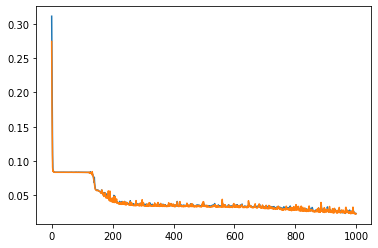

In [22]:
ax = plt.figure().add_subplot()
ax.plot(range(len(mean_squared_error)),mean_squared_error,label='train')
ax.plot(range(len(mean_squared_error)),val_mean_squared_error,label='val')

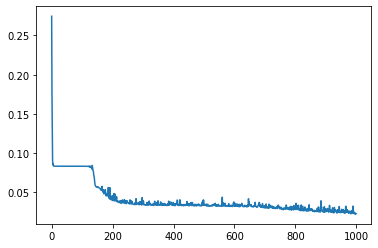

In [23]:
ax = plt.figure().add_subplot()
ax.plot(range(len(mean_squared_error)),val_mean_squared_error,label='val')

In [24]:
pre = model.predict(Xtest, batch_size=BATCH_SIZE)
print(pre.shape)

(1000, 3)


In [25]:
ae=np.maximum(pre-Ytest,Ytest-pre)
print(ae)
mae0=np.mean(ae[:,0])
mae1=np.mean(ae[:,1])
mae2=np.mean(ae[:,2])
mse0 = math.sqrt(mae0)
mse1 = math.sqrt(mae1)
mse2 = math.sqrt(mae2)
print("\nMAE0: {:.3f}, MAE1: {:.3f}, MAE2: {:.3f},".format(mae0, mae1,mae2))
print("\nMSE0: {:.3f}, MSE1: {:.3f}, MSE2: {:.3f},".format(mse0, mse1,mse2))


[[0.13110618 0.01160367 0.02476147]
 [0.18558934 0.00533537 0.16514934]
 [0.10018507 0.01773531 0.15119396]
 ...
 [0.12014635 0.01591684 0.05571685]
 [0.29426428 0.00058561 0.12048666]
 [0.0873094  0.04324383 0.12446305]]

MAE0: 0.184, MAE1: 0.019, MAE2: 0.106,

MSE0: 0.428, MSE1: 0.138, MSE2: 0.325,


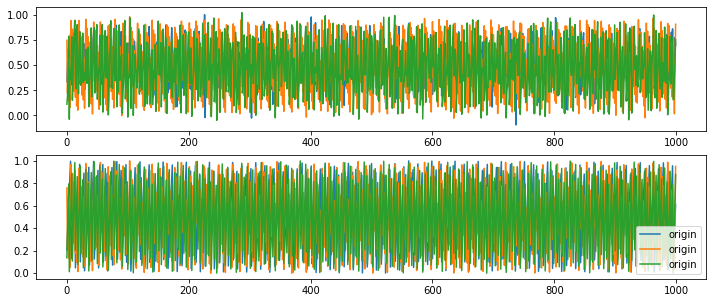

In [26]:
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(pre,label='predctions')
plt.subplot(212)
plt.plot(Ytest,label='origin')
plt.legend()
plt.show()

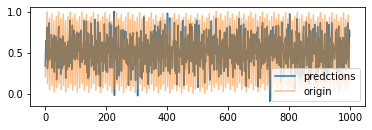

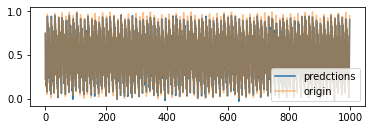

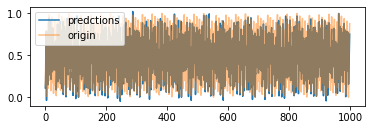

In [27]:
plt.figure(1)
plt.subplot(211)
plt.plot(pre[:,0],label='predctions',alpha=1)
plt.plot(Ytest[:,0],label='origin',alpha=0.5)
plt.legend(['predctions','origin'])

plt.figure(2)
plt.subplot(211)
plt.plot(pre[:,1],label='predctions',alpha=1)
plt.plot(Ytest[:,1],label='origin',alpha=0.5)
plt.legend()

plt.figure(3)
plt.subplot(211)
plt.plot(pre[:,2],label='predctions',alpha=1)
plt.plot(Ytest[:,2],label='origin',alpha=0.5)
plt.legend()
plt.show()

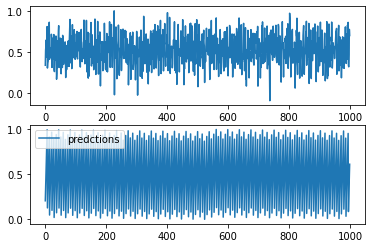

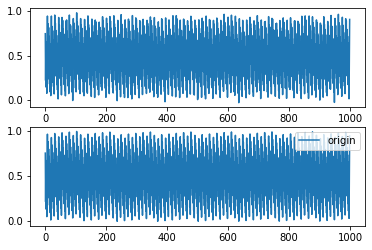

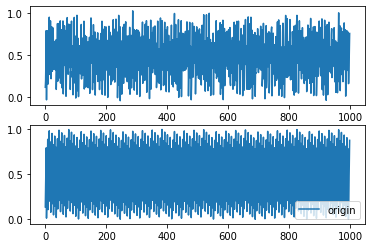

In [28]:
plt.figure(1)
plt.subplot(211)
plt.plot(pre[:,0],label='predctions')
plt.subplot(212)
plt.plot(Ytest[:,0],label='origin')
plt.legend(['predctions','origin'])

plt.figure(2)
plt.subplot(211)
plt.plot(pre[:,1],label='predctions')
plt.subplot(212)
plt.plot(Ytest[:,1],label='origin')
plt.legend()

plt.figure(3)
plt.subplot(211)
plt.plot(pre[:,2],label='predctions')
plt.subplot(212)
plt.plot(Ytest[:,2],label='origin')
plt.legend()
plt.show()

In [29]:
origin_Y = np.load('/home/chase/Boyka/Lyu/fac_cond256_unit8.npz')['fac'].astype(np.float64)
origin_Y_test=origin_Y[-1000:]
print(origin_Y_test)
pre_Y=np.zeros(origin_Y_test.shape)
pre_Y[:,0]=pre[:,0]*(y_max[0]-y_min[0])+y_min[0]
pre_Y[:,1]=pre[:,1]*(y_max[1]-y_min[1])+y_min[1]
pre_Y[:,2]=pre[:,2]*(y_max[2]-y_min[2])+y_min[2]
print(pre_Y)

[[1.828456 0.825891 0.00412 ]
 [2.354607 0.771756 0.010689]
 [2.880759 0.817621 0.017258]
 ...
 [2.401155 0.75331  0.013189]
 [2.927307 0.799175 0.019758]
 [3.453458 0.84504  0.026327]]
[[2.35260224e+00 8.24731171e-01 3.37747787e-03]
 [3.09657001e+00 7.72289276e-01 5.73666673e-03]
 [3.28128624e+00 8.15848291e-01 1.27241462e-02]
 ...
 [2.88148522e+00 7.51719058e-01 1.15182186e-02]
 [4.10373926e+00 7.99233496e-01 1.61449667e-02]
 [3.80251026e+00 8.40717673e-01 2.25947257e-02]]


In [36]:
print(score)
print( math.sqrt(score))

0.02284880168735981
0.15115820086042242


In [34]:
ae=np.maximum(pre_Y-origin_Y_test,origin_Y_test-pre_Y)
print(np.mean(ae))
mae0=np.mean(ae[:,0])
mae1=np.mean(ae[:,1])
mae2=np.mean(ae[:,2])
mse0 = math.sqrt(mae0)
mse1 = math.sqrt(mae1)
mse2 = math.sqrt(mae2)
print("\nMAE0: {:.3f}, MAE1: {:.3f}, MAE2: {:.3f},".format(mae0, mae1,mae2))
print("\nMSE0: {:.3f}, MSE1: {:.3f}, MSE2: {:.3f},".format(mse0, mse1,mse2))

0.24633797428469803

MAE0: 0.734, MAE1: 0.002, MAE2: 0.003,

MSE0: 0.857, MSE1: 0.043, MSE2: 0.056,


In [31]:
y_max[0]-y_min[0],y_max[1]-y_min[1],y_max[2]-y_min[2]


(3.9978760000000007, 0.09995299999999996, 0.029987)

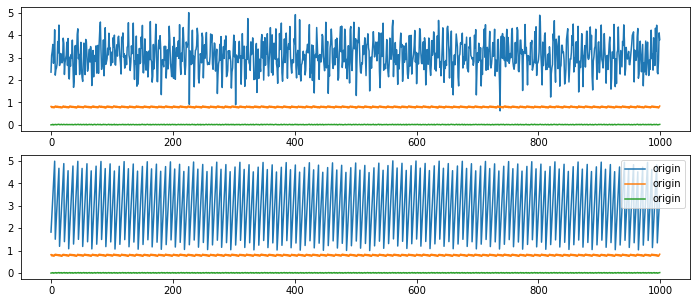

In [32]:
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(pre_Y,label='predctions')
plt.subplot(212)
plt.plot(origin_Y_test,label='origin')
plt.legend()
plt.show()

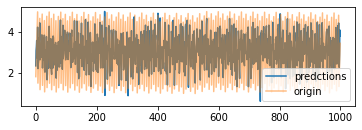

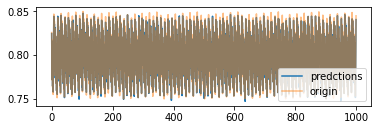

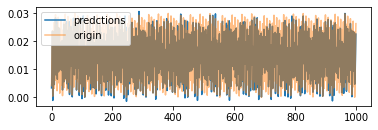

In [33]:
plt.figure(1)
plt.subplot(211)
plt.plot(pre_Y[:,0],label='predctions',alpha=1)
plt.plot(origin_Y_test[:,0],label='origin',alpha=0.5)
plt.legend(['predctions','origin'])

plt.figure(2)
plt.subplot(211)
plt.plot(pre_Y[:,1],label='predctions',alpha=1)
plt.plot(origin_Y_test[:,1],label='origin',alpha=0.5)
plt.legend()

plt.figure(3)
plt.subplot(211)
plt.plot(pre_Y[:,2],label='predctions',alpha=1)
plt.plot(origin_Y_test[:,2],label='origin',alpha=0.5)
plt.legend()
plt.show()